In [2]:
import os
import detectron2

from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog


/userhome/34/h3567721/anaconda3/envs/pytorch-v/lib/python3.6/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [3]:
def format_file_list(data_root, split):
    with open(data_root + '/%s.txt' % split, 'r') as f:
        frames = f.readlines()

    subfolders = [x.split(' ')[0] for x in frames]
    frame_ids = [x.split(' ')[1][:-1] for x in frames]

    image_file_list = [os.path.join(data_root, subfolders[i],
                                    frame_ids[i] + '.jpg') for i in range(len(frames))]
    return image_file_list

In [4]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("Cityscapes/mask_rcnn_R_50_FPN.yaml"))

In [5]:
print(cfg.MODEL.WEIGHTS)

detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl


In [6]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("Cityscapes/mask_rcnn_R_50_FPN.yaml")
predictor = DefaultPredictor(cfg)

In [7]:
print(cfg.MODEL.WEIGHTS)

https://dl.fbaipublicfiles.com/detectron2/Cityscapes/mask_rcnn_R_50_FPN/142423278/model_final_af9cf5.pkl


In [8]:
base_path = "/userhome/34/h3567721/dataset/kitti"
kitti_raw_eigen_data_dir = os.path.join(base_path, "kitti_raw_eigen")
image_file_list = format_file_list(kitti_raw_eigen_data_dir, split="train")

In [9]:
print(len(image_file_list))

40238


In [80]:
def seg_sig_img(img_path):
    print(img_path)    
    im = cv2.imread(img_path)
    cv2_imshow(im)
    outputs = predictor(im)
    print(outputs["instances"].pred_classes)
    print(outputs["instances"].pred_boxes)
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])
    
    return im, outputs

/userhome/34/h3567721/dataset/kitti/kitti_raw_eigen/2011_10_03_drive_0034_sync_03/0000000686.jpg


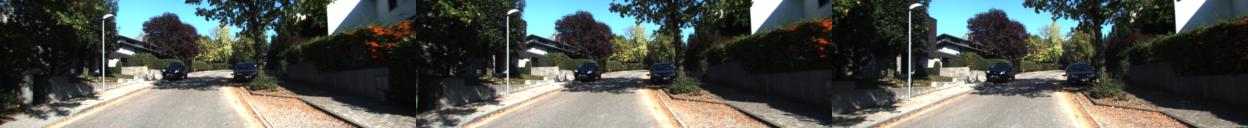

tensor([2, 2, 2, 2, 2, 2], device='cuda:0')
Boxes(tensor([[ 232.3062,   61.7408,  257.0699,   84.3015],
        [ 648.6677,   63.1327,  676.5665,   86.9518],
        [ 985.3768,   61.8704, 1015.2175,   83.7507],
        [1063.9064,   62.5671, 1097.0079,   91.1293],
        [ 573.6240,   61.1512,  601.5639,   83.2607],
        [ 159.8082,   60.8721,  187.9119,   82.3578]], device='cuda:0'))


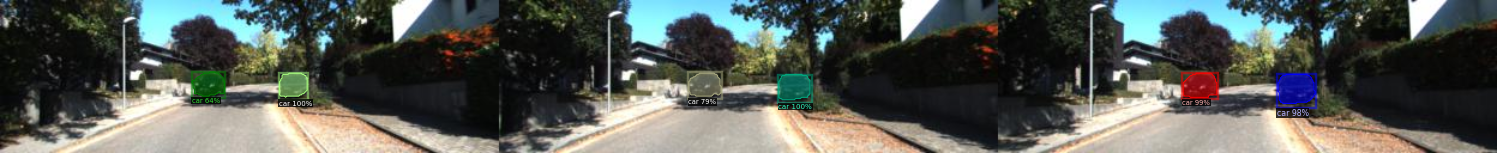

In [81]:
img, seg_img = seg_sig_img(image_file_list[5673])

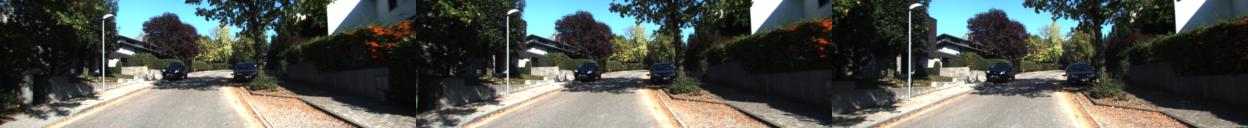

In [97]:
cv2_imshow(img)

In [82]:
seg_img["instances"].scores

tensor([0.9993, 0.9962, 0.9905, 0.9831, 0.7917, 0.6417], device='cuda:0')

In [83]:
seg_img["instances"].pred_classes

tensor([2, 2, 2, 2, 2, 2], device='cuda:0')

In [84]:
seg_img["instances"].pred_masks[0].shape

torch.Size([128, 1248])

In [85]:
len(seg_img["instances"].pred_masks)

6

In [86]:
seg_img["instances"].pred_masks[0]

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]], device='cuda:0')

In [87]:
MetadataCatalog.get(cfg.DATASETS.TRAIN[0])

Metadata(evaluator_type='cityscapes_instance', gt_dir='datasets/cityscapes/gtFine/train', image_dir='datasets/cityscapes/leftImg8bit/train', name='cityscapes_fine_instance_seg_train', stuff_classes=['road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle', 'license plate'], thing_classes=['person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle'])

In [88]:
thing_classes=['person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle']

In [89]:
import numpy as np
import matplotlib.pyplot as plt

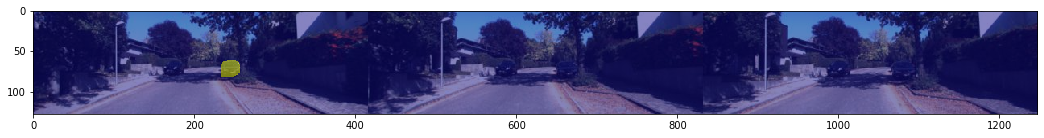

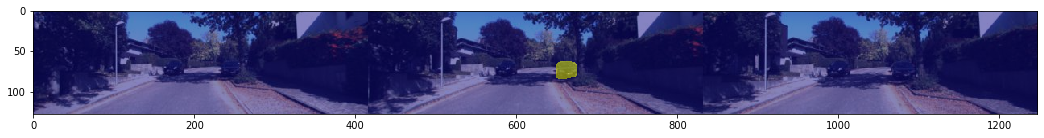

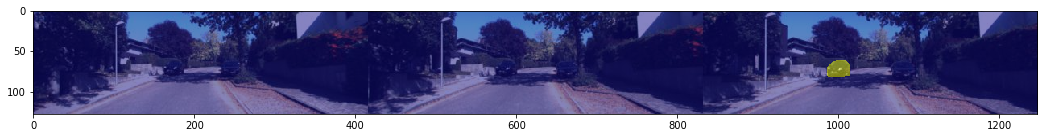

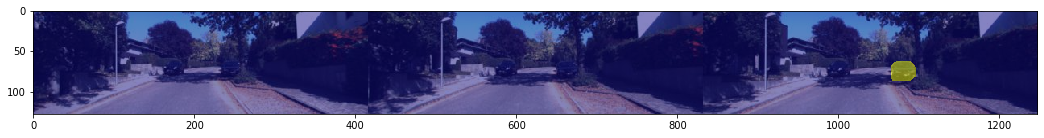

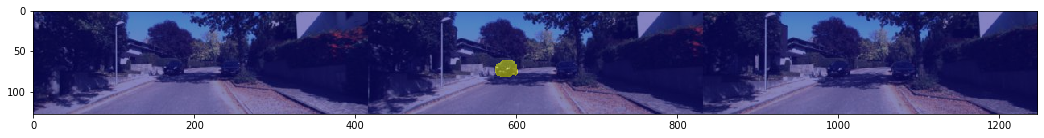

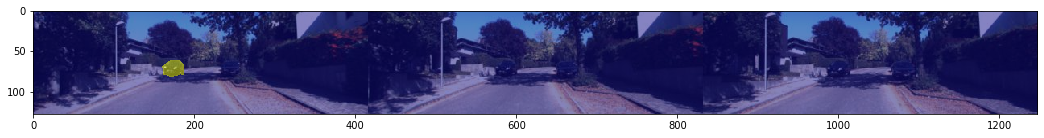

In [102]:
for i in range(len(seg_img["instances"].pred_masks)):
    plt.figure(figsize=(18,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.imshow(seg_img["instances"].pred_masks[i].cpu(), 'plasma', alpha=0.5)
    plt.show()